# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets/Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

Step 1. At each round $n$, we consider two numbers for each ad $i$:

- $N_{i}^{1}(n)$ - the number of times the ad $i$ got reward 1 up to round $n$,
- $N_{i}^{0}(n)$ - the number of times the ad $i$ got reward 0 up to round $n$.


In [3]:
N = 1000
d = 10
selected_ads = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

Step 2. For each ad $i$, we take a random draw from the distribution below:

$
\theta_{i}(n) = \beta\left(N_{i}^{1}(n) + 1, N_{i}^{0}(n) + 1\right)
$

Step 3. We select the ad that has the highest $\theta_{i}(n)$.

In [4]:
import random

for n in range(0, N): 
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    selected_ads.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    total_reward = total_reward + reward

## Visualising the results - Histogram

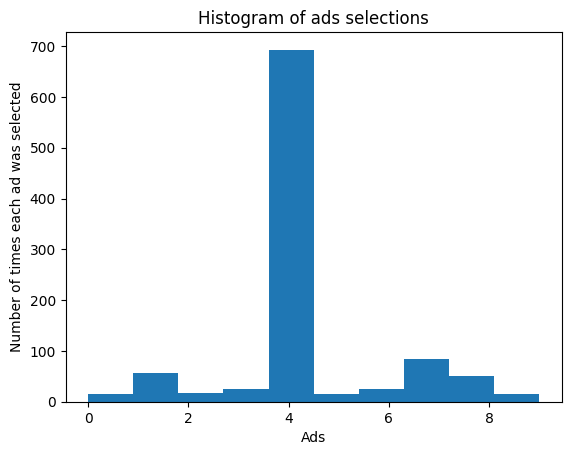

In [5]:
plt.hist(selected_ads)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()